In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf

### Regressions: what factors cause variations in prices of SOL

In [1]:
#Dependent Variable: the daily price of Solana measured by (Open Price+Close Price+High Price+Low Price)/4
#This is also the case for other prices
sol_pr = yf.download('SOL-USD',period='12mo',ignore_tz=True)
sol_pr['Date']=sol_pr.index
sol_pr['Date'] = pd.to_datetime(sol_pr['Date']).dt.date
sol_pr.set_index('Date', inplace=True)
sol_pr['Sol_Price']=sol_pr['Adj Close'].pct_change()
sol_pr=sol_pr[['Sol_Price']]

NameError: name 'yf' is not defined

In [59]:
# Matching with Variances that Bailee used by adding ('ACWI' 'Gold''Oil''DBC' 'TPINX') 
#Changing GOLD to GLD


#Equity: ACWI MSCI*
#Bonds Alternative: Templeton Global Bond Fund (TPINX) 
#Commodities:DBC, S&P-GSCI Commodity Index Future (GD=F)
#Market Volatility: VIX
#Credit:. Fidelity Global Credit Fund (FGBFX)
#Emg Mkts:
#- EM Equity: MSCI Emerging Markets Net Return Index,  ACWI
#- EM Net Total Return: The MSCI Emerging Markets (EM) Net Total Return Index
#USD Inflation: GOLD OIL CPI*

In [60]:
# Taking Richard's suggestionsa and added 
#ICE BofA High Yield US Emerging Markets Liquid Corporate Plus Index Option-Adjusted Spread)
#Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity

In [3]:
#VIX

VIX= yf.download('^VIX',period='12mo',ignore_tz=True)
VIX['Date']=VIX.index
VIX['Date'] = pd.to_datetime(VIX['Date']).dt.date
VIX.set_index('Date', inplace=True)
VIX['VIX']=VIX['Adj Close'].pct_change()
VIX=VIX[['VIX']]

[*********************100%***********************]  1 of 1 completed


In [4]:
#Bonds Alternative: Templeton Global Bond Fund (TPINX)

TPINX= yf.download('TPINX',period='36mo',ignore_tz=True)
TPINX['Date']=TPINX.index
TPINX['Date'] = pd.to_datetime(TPINX['Date']).dt.date
TPINX.set_index('Date', inplace=True)
TPINX['TPINX']=TPINX['Adj Close'].pct_change()
TPINX=TPINX[['TPINX']]

[*********************100%***********************]  1 of 1 completed


In [5]:
#Credit:. Fidelity Global Credit Fund (FGBFX)

FGBFX= yf.download('FGBFX',period='36mo',ignore_tz=True)
FGBFX['Date']=FGBFX.index
FGBFX['Date'] = pd.to_datetime(FGBFX['Date']).dt.date
FGBFX.set_index('Date', inplace=True)
FGBFX['FGBFX']=FGBFX['Adj Close'].pct_change()
FGBFX=FGBFX[['FGBFX']]

[*********************100%***********************]  1 of 1 completed


In [6]:
#Commodities: DBC

DBC= yf.download('DBC',period='36mo',ignore_tz=True)
DBC['Date']=DBC.index
DBC['Date'] = pd.to_datetime(DBC['Date']).dt.date
DBC.set_index('Date', inplace=True)
DBC['DBC']=DBC['Adj Close'].pct_change()
DBC=DBC[['DBC']]

[*********************100%***********************]  1 of 1 completed


In [7]:
#Commodities: S&P-GSCI Commodity Index Future (GD=F) 

GSCI = yf.download('GD=F',period='36mo',ignore_tz=True)
GSCI['Date']=GSCI.index
GSCI['Date'] = pd.to_datetime(GSCI['Date']).dt.date
GSCI.set_index('Date', inplace=True)
GSCI['GSCI']=GSCI['Adj Close'].pct_change()
GSCI=GSCI[['GSCI']]

[*********************100%***********************]  1 of 1 completed


In [8]:
#EM Equity ACWI (iShares MSCI ACWI ETF)

ACWI= yf.download('ACWI',period='36mo',ignore_tz=True)
ACWI['Date']=ACWI.index
ACWI['Date'] = pd.to_datetime(ACWI['Date']).dt.date
ACWI.set_index('Date', inplace=True)
ACWI['ACWI']=ACWI['Adj Close'].pct_change()
ACWI=ACWI[['ACWI']]

[*********************100%***********************]  1 of 1 completed


In [9]:
#The MSCI Emerging Markets (EM) Net Total Return Index Futures

em_ntr = yf.download('MMN=F',period='36mo',ignore_tz=True)
em_ntr['Date']=em_ntr.index
em_ntr['Date'] = pd.to_datetime(em_ntr['Date']).dt.date
em_ntr.set_index('Date', inplace=True)
em_ntr['em_ntr']=em_ntr['Adj Close'].pct_change()
em_ntr=em_ntr[['em_ntr']]


[*********************100%***********************]  1 of 1 completed


In [68]:
#MCSI

#MCSI= yf.download('MCSI',period='36mo',ignore_tz=True)
#MCSI['Date']=MCSI.index
#MCSI['Date'] = pd.to_datetime(MCSI['Date']).dt.date
#MCSI.set_index('Date', inplace=True)
#MCSI['MCSI']=(MCSI['Open']+MCSI['Close']+MCSI['High']+MCSI['Low'])/4
#MCSI=MCSI[['MCSI']]

In [10]:
#EM currency Index 

em_currency=pd.read_csv('MSCI Intl Emerging Market Currency Historical Data.csv')
em_currency['Date'] = pd.to_datetime(em_currency['Date'])
em_currency.set_index('Date', inplace=True)

em_currency=em_currency[['Price']]
em_currency.rename(columns={'Price':'em_currency'},inplace=True)
em_currency=em_currency.sort_index()
em_currency['em_currency'] = em_currency['em_currency'].str.replace(',', '').astype(float)
em_currency['em_currency']=em_currency['em_currency'].pct_change()

em_currency=em_currency[['em_currency']]

In [11]:
#Gold (as a measure of inflation)

Gold= yf.download('GLD',period='36mo',ignore_tz=True)
Gold['Date']=Gold.index
Gold['Date'] = pd.to_datetime(Gold['Date']).dt.date
Gold.set_index('Date', inplace=True)
Gold['Gold']=Gold['Adj Close'].pct_change()
Gold=Gold[['Gold']]

[*********************100%***********************]  1 of 1 completed


In [12]:
#Oil (as a measure of inflation)

Oil= yf.download('CL=F',period='36mo',ignore_tz=True)
Oil['Date']=Oil.index
Oil['Date'] = pd.to_datetime(Oil['Date']).dt.date
Oil.set_index('Date', inplace=True)
Oil['Oil']=Oil['Adj Close'].pct_change()
Oil=Oil[['Oil']]

[*********************100%***********************]  1 of 1 completed


In [13]:
USD= yf.download('DX-Y.NYB',period='36mo',ignore_tz=True)
USD['Date']=USD.index
USD['Date'] = pd.to_datetime(USD['Date']).dt.date
USD.set_index('Date', inplace=True)
USD['USD']=USD['Adj Close'].pct_change()
USD=USD[['USD']]

[*********************100%***********************]  1 of 1 completed


In [326]:
#Inflation: CPI distributed across each day 

#cpi=pd.read_csv('CPI.csv')
#cpi['Label'] = pd.to_datetime(cpi['Label'])
#cpi.rename(columns = {'Label':'Date'}, inplace = True)
#cpi.rename(columns = {'Value':'CPI'}, inplace = True)
#cpi.set_index('Date', inplace=True)
#cpi=cpi[['CPI']]

#start_date = cpi.index.min() - pd.DateOffset(day=1)
#end_date = cpi.index.max() + pd.DateOffset(day=31)
#dates=pd.date_range(start_date, end_date, freq='D')
#dates.name= 'Date'
#cpi= cpi.reindex(dates, method='ffill')
#cpi=cpi[['CPI']]

In [327]:
#cpi

,CPI
Date,
2020-01-01,257.971
2020-01-02,257.971
2020-01-03,257.971
2020-01-04,257.971
2020-01-05,257.971
...,...
2023-01-27,299.170
2023-01-28,299.170
2023-01-29,299.170


In [14]:
#Liquidity Index
#ICE BofA High Yield US Emerging Markets Liquid Corporate Plus Index Option-Adjusted Spread

Liquidity_Index=pd.read_csv('BAMLEMHYHYLCRPIUSOAS.csv',index_col="DATE")
Liquidity_Index.index = pd.to_datetime(Liquidity_Index.index)
Liquidity_Index.index.names = ['Date']
Liquidity_Index=Liquidity_Index[Liquidity_Index['BAMLEMHYHYLCRPIUSOAS'] != '.']

Liquidity_Index['BAMLEMHYHYLCRPIUSOAS']=Liquidity_Index['BAMLEMHYHYLCRPIUSOAS'].astype(float).pct_change()

In [15]:
#Credit Spread
Credit_Spread=pd.read_csv('BAA10Y.csv',index_col="DATE")
Credit_Spread.index = pd.to_datetime(Credit_Spread.index)
Credit_Spread.index.names = ['Date']

Credit_Spread=Credit_Spread[Credit_Spread['BAA10Y'] != '.']

Credit_Spread['BAA10Y'] = Credit_Spread['BAA10Y'].astype(float).pct_change()

In [313]:
Credit_Spread

,BAA10Y
Date,
2018-03-21,NaN
2018-03-22,0.010989
2018-03-23,0.016304
2018-03-26,-0.016043
2018-03-27,0.010870
...,...
2023-03-15,0.052133
2023-03-16,-0.027027
2023-03-17,0.023148


In [16]:
data=pd.concat([sol_pr,VIX,TPINX,FGBFX,DBC,ACWI,em_ntr,em_currency,Gold,Oil,USD,Liquidity_Index,Credit_Spread],axis=1,join = 'inner')
data

C:\Users\Yu Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:347: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,Sol_Price,VIX,TPINX,FGBFX,DBC,ACWI,em_ntr,em_currency,Gold,Oil,USD,BAMLEMHYHYLCRPIUSOAS,BAA10Y
Date,,,,,,,,,,,,,
2020-04-13,-0.118611,-0.011999,0.000998,0.003257,0.017301,-0.008000,0.003121,-0.001461,0.017140,-0.015378,-0.001708,-0.010073,-0.055402
2020-04-14,-0.149013,-0.082827,-0.000997,0.009740,-0.008503,0.025715,0.022738,0.000210,0.007868,-0.102633,-0.004630,-0.041628,-0.014663
2020-04-15,-0.023075,0.081568,0.003903,0.005359,-0.020583,-0.024922,-0.025275,-0.003198,-0.005102,-0.011934,0.005764,-0.003861,-0.008929
2020-04-16,0.068298,-0.017875,0.002991,0.000000,-0.002627,0.004260,0.005762,-0.002443,-0.000865,0.000000,0.005731,-0.005814,-0.015015
2020-04-17,-0.043554,-0.048866,0.001989,-0.001066,0.004390,0.027269,0.021007,0.001496,-0.019417,-0.080523,-0.002499,-0.017544,-0.003049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,0.039523,-0.007437,-0.001280,0.000000,-0.007491,-0.002529,-0.010287,-0.002894,0.002987,-0.027392,0.000000,0.022472,0.027174
2023-02-21,-0.047088,0.142358,-0.008974,-0.009162,0.001258,-0.017087,-0.012944,-0.001638,-0.003737,-0.002358,0.003081,0.021938,-0.010582
2023-02-22,-0.030752,-0.025361,0.001294,0.000000,-0.012982,-0.002692,-0.005563,-0.002410,-0.005626,-0.029018,0.003935,0.000000,-0.010695


In [17]:
data.info()
#convert objects to float

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2020-04-13 to 2023-02-24
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sol_Price             716 non-null    float64
 1   VIX                   716 non-null    float64
 2   TPINX                 716 non-null    float64
 3   FGBFX                 716 non-null    float64
 4   DBC                   716 non-null    float64
 5   ACWI                  716 non-null    float64
 6   em_ntr                716 non-null    float64
 7   em_currency           716 non-null    float64
 8   Gold                  716 non-null    float64
 9   Oil                   716 non-null    float64
 10  USD                   716 non-null    float64
 11  BAMLEMHYHYLCRPIUSOAS  716 non-null    float64
 12  BAA10Y                716 non-null    float64
dtypes: float64(13)
memory usage: 78.3+ KB


In [18]:
data.isnull().sum()

Sol_Price               0
VIX                     0
TPINX                   0
FGBFX                   0
DBC                     0
ACWI                    0
em_ntr                  0
em_currency             0
Gold                    0
Oil                     0
USD                     0
BAMLEMHYHYLCRPIUSOAS    0
BAA10Y                  0
dtype: int64

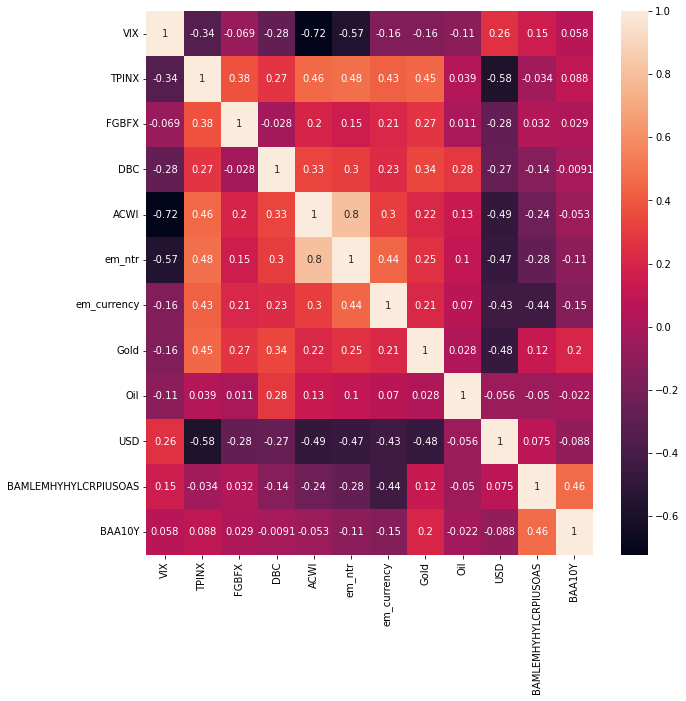

In [19]:
x_var=data.drop(columns=['Sol_Price'])
y_var=data['Sol_Price']
corr = x_var.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [20]:
import statsmodels.formula.api as smf

reg = smf.ols('Sol_Price ~ VIX+TPINX+FGBFX+DBC+ACWI+em_ntr+em_currency+Gold+Oil+USD+BAMLEMHYHYLCRPIUSOAS+BAA10Y', data=data)
reg_result = reg.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sol_Price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     7.874
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           6.81e-14
Time:                        14:42:11   Log-Likelihood:                 816.14
No. Observations:                 716   AIC:                            -1606.
Df Residuals:                     703   BIC:                            -1547.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0037      0.003      1.250      0.212      -0.002       0.010
VIX                     -0.0580      0.054     -1.066      0.287      -0.165       0.049
TPINX                    0.2722      1.028      0.265      0.791      -1.745       2.290
FGBFX                   -0.7519      0.998     -0.753      0.452      -2.712       1.208
DBC                     -0.0425      0.253     -0.168      0.867      -0.539       0.454
ACWI                     1.6814      0.539      3.120      0.002       0.623       2.740
em_ntr                   0.3078      0.403      0.765      0.445      -0.483       1.098
em_currency              0.0319      1.548      0.021      0.984      -3.007       3.071
Gold                     0.2145      0.387      0.554      0.580      -0.546       0.975
Oil                      0.0124      0.024      0.522      0.602      -0.034       0.059
USD                     -0.7210      0.925     -0.779      0.436      -2.537       1.095
BAMLEMHYHYLCRPIUSOAS     0.4602      0.276      1.665      0.096      -0.082       1.003
BAA10Y                  -0.3335      0.227     -1.469      0.142      -0.779       0.112
==============================================================================
Omnibus:                       97.132   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.028
Skew:                           0.450   Prob(JB):                    2.00e-118
Kurtosis:                       7.166   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### if to deal with multicollinearity

In [21]:
# This is the summary table function I got from Mehdi
#https://stackoverflow.com/questions/40072870/statistical-summary-table-in-sklearn-linear-model-ridge
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)
    

In [22]:
#Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge=Ridge()
ridge.fit(x_var, y_var)

rdg_result = regression_analysis(x_var,y_var,ridge)
rdg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sol_Price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.021
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           4.77e-08
Time:                        14:42:23   Log-Likelihood:                 800.43
No. Observations:                 716   AIC:                            -1575.
Df Residuals:                     703   BIC:                            -1515.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0047      0.003      1.548      0.122      -0.001       0.011
VIX                     -0.2013      0.056     -3.618      0.000      -0.311      -0.092
TPINX                    0.0217      1.050      0.021      0.983      -2.041       2.084
FGBFX                    0.0060      1.020      0.006      0.995      -1.998       2.010
DBC                      0.0326      0.258      0.126      0.900      -0.475       0.540
ACWI                     0.1038      0.551      0.188      0.851      -0.978       1.185
em_ntr                   0.1062      0.411      0.258      0.796      -0.702       0.914
em_currency              0.0079      1.582      0.005      0.996      -3.099       3.115
Gold                     0.0356      0.396      0.090      0.928      -0.742       0.813
Oil                      0.0196      0.024      0.807      0.420      -0.028       0.067
USD                     -0.0323      0.946     -0.034      0.973      -1.889       1.824
BAMLEMHYHYLCRPIUSOAS     0.0068      0.283      0.024      0.981      -0.548       0.562
BAA10Y                  -0.0187      0.232     -0.080      0.936      -0.474       0.437
==============================================================================
Omnibus:                      101.300   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.048
Skew:                           0.431   Prob(JB):                    5.16e-141
Kurtosis:                       7.573   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Lasso
lasso=Lasso()
lasso.fit(x_var, y_var)

las_result = regression_analysis(x_var,y_var,lasso)
las_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sol_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               1.00
Time:                        14:42:26   Log-Likelihood:                 770.99
No. Observations:                 716   AIC:                            -1516.
Df Residuals:                     703   BIC:                            -1457.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0043      0.003      1.367      0.172      -0.002       0.011
VIX                          -0      0.058         -0      1.000      -0.114       0.114
TPINX                         0      1.094          0      1.000      -2.149       2.149
FGBFX                         0      1.063          0      1.000      -2.088       2.088
DBC                           0      0.269          0      1.000      -0.529       0.529
ACWI                          0      0.574          0      1.000      -1.127       1.127
em_ntr                        0      0.429          0      1.000      -0.842       0.842
em_currency                   0      1.649          0      1.000      -3.237       3.237
Gold                          0      0.412          0      1.000      -0.810       0.810
Oil                           0      0.025          0      1.000      -0.050       0.050
USD                          -0      0.985         -0      1.000      -1.935       1.935
BAMLEMHYHYLCRPIUSOAS         -0      0.294         -0      1.000      -0.578       0.578
BAA10Y                       -0      0.242         -0      1.000      -0.475       0.475
==============================================================================
Omnibus:                       96.694   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.124
Skew:                           0.431   Prob(JB):                    1.42e-122
Kurtosis:                       7.250   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## PCA: Finding the common drivers

In [243]:
#!pip install factor_analyzer
import factor_analyzer

In [244]:
# some functions to format PCA results
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squared Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

Adding variables

In [245]:
import yfinance as yf
import datetime as dt

In [247]:
SOL= yf.download('SOL-USD',period='100mo', interval='1d')
SOL['Date']=SOL.index
SOL['Date'] = pd.to_datetime(SOL['Date']).dt.date
SOL.set_index('Date', inplace=True)
SOL['SOL']=SOL['Adj Close'].pct_change()
SOL=SOL[['SOL']]

[*********************100%***********************]  1 of 1 completed


In [248]:
MATIC= yf.download('MATIC-USD',period='100mo',interval='1d')
MATIC['Date']=MATIC.index
MATIC['Date'] = pd.to_datetime(MATIC['Date']).dt.date
MATIC.set_index('Date', inplace=True)
MATIC['MATIC']=MATIC['Adj Close'].pct_change()
MATIC=MATIC[['MATIC']]

[*********************100%***********************]  1 of 1 completed


In [249]:
ETH=yf.download('ETH-USD',period='100mo',interval='1d')
ETH['Date']=ETH.index
ETH['Date'] = pd.to_datetime(ETH['Date']).dt.date
ETH.set_index('Date', inplace=True)
ETH['ETH']=ETH['Adj Close'].pct_change()
ETH=ETH[['ETH']]

[*********************100%***********************]  1 of 1 completed


In [250]:
BTC=yf.download('BTC-USD',period='100mo',interval='1d')
BTC['Date']=BTC.index
BTC['Date'] = pd.to_datetime(BTC['Date']).dt.date
BTC.set_index('Date', inplace=True)
BTC['BTC']=BTC['Adj Close'].pct_change()
BTC=BTC[['BTC']]

[*********************100%***********************]  1 of 1 completed


In [251]:
Gold= yf.download('GLD',period='100mo',interval='1d')
Gold['Date']=Gold.index
Gold['Date'] = pd.to_datetime(Gold['Date']).dt.date
Gold.set_index('Date', inplace=True)
Gold['Gold']=Gold['Adj Close'].pct_change()
Gold=Gold[['Gold']]

[*********************100%***********************]  1 of 1 completed


In [252]:
USD= yf.download('DX-Y.NYB',period='100mo',interval='1d')
USD['Date']=USD.index
USD['Date'] = pd.to_datetime(USD['Date']).dt.date
USD.set_index('Date', inplace=True)
USD['USD']=USD['Adj Close'].pct_change()
USD=USD[['USD']]

[*********************100%***********************]  1 of 1 completed


In [253]:
XRP= yf.download('XRP-USD',period='100mo',interval='1d')
XRP['Date']=XRP.index
XRP['Date'] = pd.to_datetime(XRP['Date']).dt.date
XRP.set_index('Date', inplace=True)
XRP['XRP']=XRP['Adj Close'].pct_change()
XRP=XRP[['XRP']]

[*********************100%***********************]  1 of 1 completed


In [254]:
Dogcoin= yf.download('DOGE-USD',period='100mo',interval='1d')
Dogcoin['Date']=Dogcoin.index
Dogcoin['Date']=pd.to_datetime(Dogcoin['Date']).dt.date
Dogcoin.set_index('Date', inplace=True)
Dogcoin['Dogcoin']=Dogcoin['Adj Close'].pct_change()
Dogcoin=Dogcoin[['Dogcoin']]

[*********************100%***********************]  1 of 1 completed


In [255]:
Cardano= yf.download('ADA-USD',period='100mo',interval='1d')
Cardano['Date']=Cardano.index
Cardano['Date'] = pd.to_datetime(Cardano['Date']).dt.date
Cardano.set_index('Date', inplace=True)
Cardano['Cardano']=Cardano['Adj Close'].pct_change()
Cardano=Cardano[['Cardano']]

[*********************100%***********************]  1 of 1 completed


In [256]:
TRON= yf.download('TRX-USD',period='100mo',interval='1d')
TRON['Date']=TRON.index
TRON['Date'] = pd.to_datetime(TRON['Date']).dt.date
TRON.set_index('Date', inplace=True)
TRON['TRON']=TRON['Adj Close'].pct_change()
TRON=TRON[['TRON']]

[*********************100%***********************]  1 of 1 completed


In [257]:
Litecoin= yf.download('LTC-USD',period='100mo',interval='1d')
Litecoin['Date']=Litecoin.index
Litecoin['Date'] = pd.to_datetime(Litecoin['Date']).dt.date
Litecoin.set_index('Date', inplace=True)
Litecoin['Litecoin']=Litecoin['Adj Close'].pct_change()
Litecoin=Litecoin[['Litecoin']]

[*********************100%***********************]  1 of 1 completed


In [258]:
BNB= yf.download('BNB-USD',period='100mo',interval='1d')
BNB['Date']=BNB.index
BNB['Date'] = pd.to_datetime(BNB['Date']).dt.date
BNB.set_index('Date', inplace=True)
BNB['BNB']=BNB['Adj Close'].pct_change()
BNB=BNB[['BNB']]

[*********************100%***********************]  1 of 1 completed


In [259]:
EOS= yf.download('EOS-USD',period='100mo',interval='1d')
EOS['Date']=EOS.index
EOS['Date'] = pd.to_datetime(EOS['Date']).dt.date
EOS.set_index('Date', inplace=True)
EOS['EOS']=EOS['Adj Close'].pct_change()
EOS=EOS[['EOS']]

[*********************100%***********************]  1 of 1 completed


In [260]:
UNI= yf.download('UNI-USD',period='100mo',interval='1d')
UNI['Date']=UNI.index
UNI['Date'] = pd.to_datetime(UNI['Date']).dt.date
UNI.set_index('Date', inplace=True)
UNI['UNI']=UNI['Adj Close'].pct_change()
UNI=UNI[['UNI']]

[*********************100%***********************]  1 of 1 completed


In [261]:
AVAX= yf.download('AVAX-USD',period='100mo',interval='1d')
AVAX['Date']=AVAX.index
AVAX['Date'] = pd.to_datetime(AVAX['Date']).dt.date
AVAX.set_index('Date', inplace=True)
AVAX['AVAX']=AVAX['Adj Close'].pct_change()
AVAX=AVAX[['AVAX']]

[*********************100%***********************]  1 of 1 completed


In [262]:
SUSHI= yf.download('SUSHI-USD',period='100mo',interval='1d')
SUSHI['Date']=SUSHI.index
SUSHI['Date'] = pd.to_datetime(SUSHI['Date']).dt.date
SUSHI.set_index('Date', inplace=True)
SUSHI['SUSHI']=SUSHI['Adj Close'].pct_change()
SUSHI=SUSHI[['SUSHI']]

[*********************100%***********************]  1 of 1 completed


In [263]:
LINK= yf.download('LINK-USD',period='100mo',interval='1d')
LINK['Date']=LINK.index
LINK['Date'] = pd.to_datetime(LINK['Date']).dt.date
LINK.set_index('Date', inplace=True)
LINK['LINK']=LINK['Adj Close'].pct_change()
LINK=LINK[['LINK']]

[*********************100%***********************]  1 of 1 completed


In [264]:
ICP= yf.download('ICP-USD',period='100mo',interval='1d')
ICP['Date']=ICP.index
ICP['Date'] = pd.to_datetime(ICP['Date']).dt.date
ICP.set_index('Date', inplace=True)
ICP['ICP']=ICP['Adj Close'].pct_change()
ICP=ICP[['ICP']]

[*********************100%***********************]  1 of 1 completed


In [265]:
APE= yf.download('APE-USD',period='100mo',interval='1d')
APE['Date']=APE.index
APE['Date'] = pd.to_datetime(APE['Date']).dt.date
APE.set_index('Date', inplace=True)
APE['APE']=APE['Adj Close'].pct_change()
APE=APE[['APE']]

[*********************100%***********************]  1 of 1 completed


In [266]:
MANA= yf.download('MANA-USD',period='100mo',interval='1d')
MANA['Date']=MANA.index
MANA['Date'] = pd.to_datetime(MANA['Date']).dt.date
MANA.set_index('Date', inplace=True)
MANA['MANA']=MANA['Adj Close'].pct_change()
MANA=MANA[['MANA']]

[*********************100%***********************]  1 of 1 completed


In [267]:
THETA= yf.download('THETA-USD',period='100mo',interval='1d')
THETA['Date']=THETA.index
THETA['Date'] = pd.to_datetime(THETA['Date']).dt.date
THETA.set_index('Date', inplace=True)
THETA['THETA']=THETA['Adj Close'].pct_change()
THETA=THETA[['THETA']]

[*********************100%***********************]  1 of 1 completed


In [268]:
STX= yf.download('STX-USD',period='100mo',interval='1d')
STX['Date']=STX.index
STX['Date'] = pd.to_datetime(STX['Date']).dt.date
STX.set_index('Date', inplace=True)
STX['STX']=STX['Adj Close'].pct_change()
STX=STX[['STX']]

[*********************100%***********************]  1 of 1 completed


In [269]:
DOT= yf.download('DOT-USD',period='100mo',interval='1d')
DOT['Date']=DOT.index
DOT['Date'] = pd.to_datetime(DOT['Date']).dt.date
DOT.set_index('Date', inplace=True)
DOT['DOT']=DOT['Adj Close'].pct_change()
DOT=DOT[['DOT']]

[*********************100%***********************]  1 of 1 completed


In [270]:
df=pd.concat([BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,Litecoin,BNB,EOS,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI],axis=1,join = 'inner')
df = df.sort_index()
df

,BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,...,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10,-0.040742,-0.032045,-0.097741,0.005968,0.003031,-0.000222,-0.095283,-0.210686,-0.071088,-0.109998,...,0.605563,-0.110712,-0.109773,NaN,-0.001371,-0.108470,-0.121121,-0.101762,-0.093545,-0.108074
2021-05-11,0.015123,0.038869,0.221869,0.054755,0.000174,-0.000776,0.063841,0.100601,0.072585,0.091751,...,-0.392913,0.061187,0.049196,-0.148408,0.225194,0.075720,0.032813,0.088491,0.057483,0.101208
2021-05-12,-0.133217,-0.047561,-0.046956,-0.091840,-0.009934,0.006323,-0.155526,-0.221826,-0.119780,-0.144980,...,0.259403,-0.130579,-0.158365,-0.299613,-0.025946,-0.148900,-0.166718,-0.133639,-0.119322,-0.045142
2021-05-13,0.011509,-0.034375,0.033503,-0.018675,0.004107,0.000441,0.088989,0.272456,0.245298,0.023370,...,-0.159629,0.092578,0.050108,0.174275,-0.151282,0.032242,0.081912,-0.026118,0.176316,0.013061
2021-05-14,0.003306,0.041954,0.396531,0.097953,0.009116,-0.004738,0.032384,0.141178,0.036784,0.027191,...,0.050245,0.056345,0.080229,0.013882,0.188381,0.029486,0.022243,0.052724,0.197701,0.256336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,0.020966,0.012660,0.017557,0.021198,0.019297,-0.001860,-0.000032,-0.000178,0.012707,0.010832,...,0.026786,0.011785,0.012393,-0.004921,0.000000,0.009980,-0.002718,-0.019916,0.008955,0.006787
2023-05-03,0.011359,-0.002110,0.030258,0.018101,0.008479,-0.006081,-0.003134,0.011509,0.005536,-0.000014,...,0.008696,0.021799,0.019540,0.033001,0.000000,0.022586,0.021526,-0.008556,0.010462,0.027045
2023-05-04,-0.005468,-0.021949,-0.023858,-0.014148,0.007033,0.000592,-0.004145,-0.015857,-0.016485,0.003018,...,-0.008621,-0.017662,-0.017599,-0.003862,0.000000,-0.021084,-0.015381,-0.018608,-0.018896,-0.012506


In [271]:
startdate = pd.to_datetime("2021-05-10").date()
enddate = pd.to_datetime("2021-12-31").date()
startdate2=pd.to_datetime("2022-01-01").date()

bull= df[startdate:enddate]
winter=df[startdate2:]

In [272]:
bull

,BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,...,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10,-0.040742,-0.032045,-0.097741,0.005968,0.003031,-0.000222,-0.095283,-0.210686,-0.071088,-0.109998,...,0.605563,-0.110712,-0.109773,NaN,-0.001371,-0.108470,-0.121121,-0.101762,-0.093545,-0.108074
2021-05-11,0.015123,0.038869,0.221869,0.054755,0.000174,-0.000776,0.063841,0.100601,0.072585,0.091751,...,-0.392913,0.061187,0.049196,-0.148408,0.225194,0.075720,0.032813,0.088491,0.057483,0.101208
2021-05-12,-0.133217,-0.047561,-0.046956,-0.091840,-0.009934,0.006323,-0.155526,-0.221826,-0.119780,-0.144980,...,0.259403,-0.130579,-0.158365,-0.299613,-0.025946,-0.148900,-0.166718,-0.133639,-0.119322,-0.045142
2021-05-13,0.011509,-0.034375,0.033503,-0.018675,0.004107,0.000441,0.088989,0.272456,0.245298,0.023370,...,-0.159629,0.092578,0.050108,0.174275,-0.151282,0.032242,0.081912,-0.026118,0.176316,0.013061
2021-05-14,0.003306,0.041954,0.396531,0.097953,0.009116,-0.004738,0.032384,0.141178,0.036784,0.027191,...,0.050245,0.056345,0.080229,0.013882,0.188381,0.029486,0.022243,0.052724,0.197701,0.256336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.003328,-0.012986,-0.052421,-0.007322,0.002367,0.000729,0.005432,-0.012183,0.039056,-0.007036,...,0.000000,-0.014028,-0.001203,0.054233,0.043409,-0.032243,-0.006656,0.107691,-0.013537,0.153706
2021-12-28,-0.060259,-0.092125,-0.083548,-0.058613,-0.004310,0.001145,-0.079060,-0.072390,-0.073136,-0.046209,...,-0.059211,-0.056189,-0.112722,-0.121489,-0.050076,-0.104889,-0.069612,-0.124785,-0.097111,-0.010359
2021-12-29,-0.024042,-0.038146,-0.011288,-0.045348,-0.000297,-0.002807,-0.042494,-0.036481,-0.050953,-0.010264,...,-0.027972,-0.039337,-0.033769,-0.031603,-0.071977,-0.028812,-0.036200,-0.061395,-0.041664,0.015420


In [273]:
winter

,BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,...,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,-0.018737,-0.034499,-0.045716,-0.017805,-0.015384,0.005958,-0.030535,-0.024742,-0.040612,-0.009012,...,-0.021127,-0.044538,0.079792,0.073509,-0.067033,-0.026321,-0.036882,-0.039068,0.012577,-0.050729
2022-01-04,-0.012066,-0.013851,-0.026886,0.008687,0.007367,0.000520,-0.009860,-0.007555,-0.007550,-0.011430,...,-0.007194,-0.045365,-0.002038,0.153732,-0.003108,-0.022805,0.008982,0.021857,-0.044091,-0.052712
2022-01-05,-0.050734,-0.076451,-0.072562,-0.064224,-0.003008,-0.001039,-0.061012,-0.055586,-0.057680,-0.063228,...,0.891304,-0.052177,0.081695,-0.090975,0.053982,-0.079089,-0.066791,-0.044266,-0.068858,-0.047221
2022-01-06,-0.009366,-0.030099,0.025190,-0.037173,-0.012244,0.000624,0.009024,0.004974,0.035421,-0.003782,...,-0.007663,-0.027123,-0.002774,-0.005401,0.007889,0.157007,-0.008430,-0.024578,-0.001318,-0.028548
2022-01-07,-0.037141,-0.093255,-0.087505,-0.065878,0.004551,-0.005299,-0.023385,-0.032394,-0.053318,-0.041990,...,-0.038610,-0.088560,0.022990,-0.011606,-0.030484,-0.098663,-0.046322,-0.044062,-0.068592,-0.040976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,0.020966,0.012660,0.017557,0.021198,0.019297,-0.001860,-0.000032,-0.000178,0.012707,0.010832,...,0.026786,0.011785,0.012393,-0.004921,0.000000,0.009980,-0.002718,-0.019916,0.008955,0.006787
2023-05-03,0.011359,-0.002110,0.030258,0.018101,0.008479,-0.006081,-0.003134,0.011509,0.005536,-0.000014,...,0.008696,0.021799,0.019540,0.033001,0.000000,0.022586,0.021526,-0.008556,0.010462,0.027045
2023-05-04,-0.005468,-0.021949,-0.023858,-0.014148,0.007033,0.000592,-0.004145,-0.015857,-0.016485,0.003018,...,-0.008621,-0.017662,-0.017599,-0.003862,0.000000,-0.021084,-0.015381,-0.018608,-0.018896,-0.012506


In [274]:
bull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 2021-05-10 to 2021-12-31
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC       165 non-null    float64
 1   SOL       165 non-null    float64
 2   MATIC     165 non-null    float64
 3   ETH       165 non-null    float64
 4   Gold      165 non-null    float64
 5   USD       165 non-null    float64
 6   XRP       165 non-null    float64
 7   Dogcoin   165 non-null    float64
 8   Cardano   165 non-null    float64
 9   TRON      165 non-null    float64
 10  Litecoin  165 non-null    float64
 11  BNB       165 non-null    float64
 12  EOS       165 non-null    float64
 13  UNI       165 non-null    float64
 14  AVAX      165 non-null    float64
 15  LINK      165 non-null    float64
 16  ICP       164 non-null    float64
 17  APE       165 non-null    float64
 18  MANA      165 non-null    float64
 19  THETA     165 non-null    float64
 20  STX       165 non-nul

In [275]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 2022-01-03 to 2023-05-09
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC       338 non-null    float64
 1   SOL       338 non-null    float64
 2   MATIC     338 non-null    float64
 3   ETH       338 non-null    float64
 4   Gold      338 non-null    float64
 5   USD       338 non-null    float64
 6   XRP       338 non-null    float64
 7   Dogcoin   338 non-null    float64
 8   Cardano   338 non-null    float64
 9   TRON      338 non-null    float64
 10  Litecoin  338 non-null    float64
 11  BNB       338 non-null    float64
 12  EOS       338 non-null    float64
 13  UNI       338 non-null    float64
 14  AVAX      338 non-null    float64
 15  LINK      338 non-null    float64
 16  ICP       338 non-null    float64
 17  APE       338 non-null    float64
 18  MANA      338 non-null    float64
 19  THETA     338 non-null    float64
 20  STX       338 non-nul

In [276]:
bull_pca= factor_analyzer.FactorAnalyzer(n_factors=bull.shape[1],
                                          rotation=None,
                                          method='principal').fit(bull)

In [278]:
get_summary(bull_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Sum of Squared Loadings,14.08,1.54,1.05,0.82,0.67,0.60,0.56,0.49,0.47,0.36,...,0.22,0.21,0.19,0.16,0.14,0.13,0.10,0.10,0.09,0.08
Proportion of Variance Explained,0.61,0.07,0.05,0.04,0.03,0.03,0.02,0.02,0.02,0.02,...,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
Cumulative Proportion,0.61,0.68,0.72,0.76,0.79,0.82,0.84,0.86,0.88,0.90,...,0.95,0.96,0.97,0.97,0.98,0.98,0.99,0.99,1.00,1.00


Text(0.5, 1.0, 'Bull Run Scree Plot')

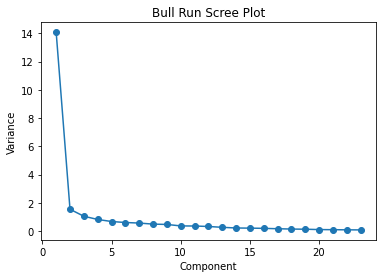

In [279]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(bull_pca.get_factor_variance()[0])),
         bull_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

plt.title('Bull Run Scree Plot')

# if we choose 2 factors

In [280]:
#bull run

In [281]:
bull_pca2factors=factor_analyzer.FactorAnalyzer(n_factors=2,
                                          method='principal').fit(bull)

In [282]:
#get loadings
bullpca2=get_loadings_communalities(bull_pca2factors,index_names=list(bull.columns))

In [291]:
bullpca2

,RC1,RC2,communalities
BTC,0.872,-0.022,0.760
SOL,0.784,-0.030,0.615
MATIC,0.788,0.132,0.639
ETH,0.928,0.046,0.864
Gold,-0.041,0.849,0.722
USD,-0.130,-0.850,0.739
XRP,0.911,0.045,0.831
Dogcoin,0.822,0.052,0.678
Cardano,0.872,0.027,0.761
TRON,0.915,0.024,0.837


<AxesSubplot:>

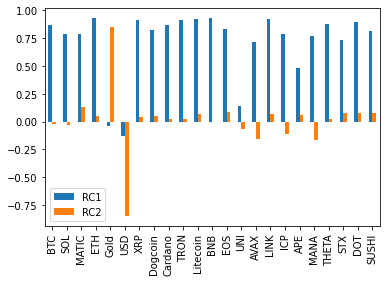

In [292]:
bullpca2[['RC1','RC2']].plot(kind="bar")

In [285]:
#winter
winter_pca= factor_analyzer.FactorAnalyzer(n_factors=bull.shape[1],
                                          rotation=None,
                                          method='principal').fit(winter)

In [294]:
get_summary(winter_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Sum of Squared Loadings,13.78,1.49,1.01,0.98,0.82,0.55,0.53,0.47,0.39,0.37,...,0.24,0.22,0.20,0.19,0.18,0.18,0.15,0.14,0.1,0.08
Proportion of Variance Explained,0.60,0.06,0.04,0.04,0.04,0.02,0.02,0.02,0.02,0.02,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.00
Cumulative Proportion,0.60,0.66,0.71,0.75,0.79,0.81,0.83,0.85,0.87,0.89,...,0.94,0.95,0.96,0.96,0.97,0.98,0.99,0.99,1.0,1.00


Text(0.5, 1.0, 'Winter Scree Plot')

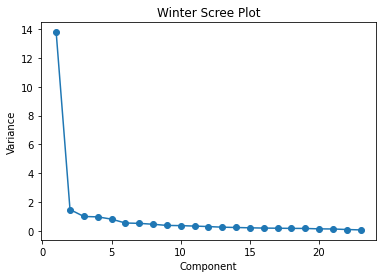

In [293]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(winter_pca.get_factor_variance()[0])),
         winter_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Winter Scree Plot')

In [295]:
#winter
winter_pca2factors=factor_analyzer.FactorAnalyzer(n_factors=2,
                                          method='principal').fit(winter)
winterpca2=get_loadings_communalities(winter_pca2factors,index_names=list(winter.columns))

In [296]:
winterpca2

,RC1,RC2,communalities
BTC,0.878,0.084,0.777
SOL,0.885,0.031,0.785
MATIC,0.873,0.041,0.764
ETH,0.909,0.056,0.830
Gold,0.024,0.872,0.761
USD,-0.188,-0.799,0.674
XRP,0.824,-0.044,0.681
Dogcoin,0.784,0.009,0.614
Cardano,0.915,0.046,0.839
TRON,0.717,0.039,0.516


<AxesSubplot:>

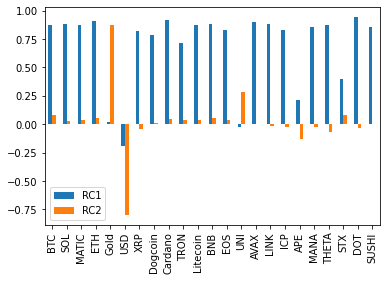

In [297]:
winterpca2[['RC1','RC2']].plot(kind="bar")